# Project-8 Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV file

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

Observation:

 The dataset contains 1000 Rows and 40 Columns

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking Null Values

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

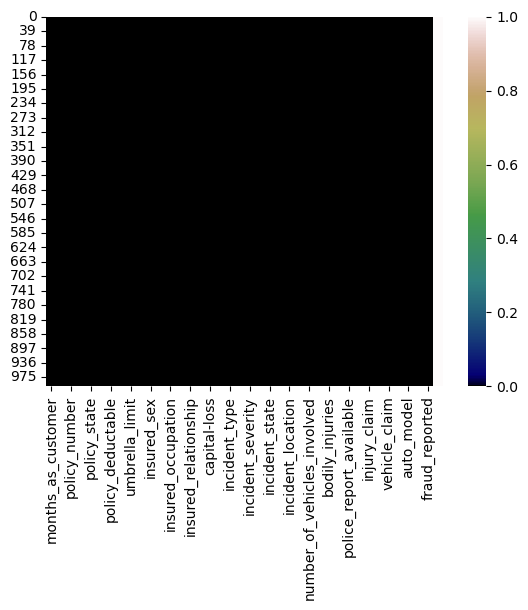

In [9]:
sns.heatmap(df.isnull(),cmap='gist_earth')
plt.show()

# Duplicate Values

In [10]:
df.duplicated().sum()

0

Observation:

The dataset contain no duplicate values.

In [11]:
df.drop(['_c39'],inplace=True,axis=1)

Observation:

This column in the dataset does not contain any value

In [12]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Statistical Summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


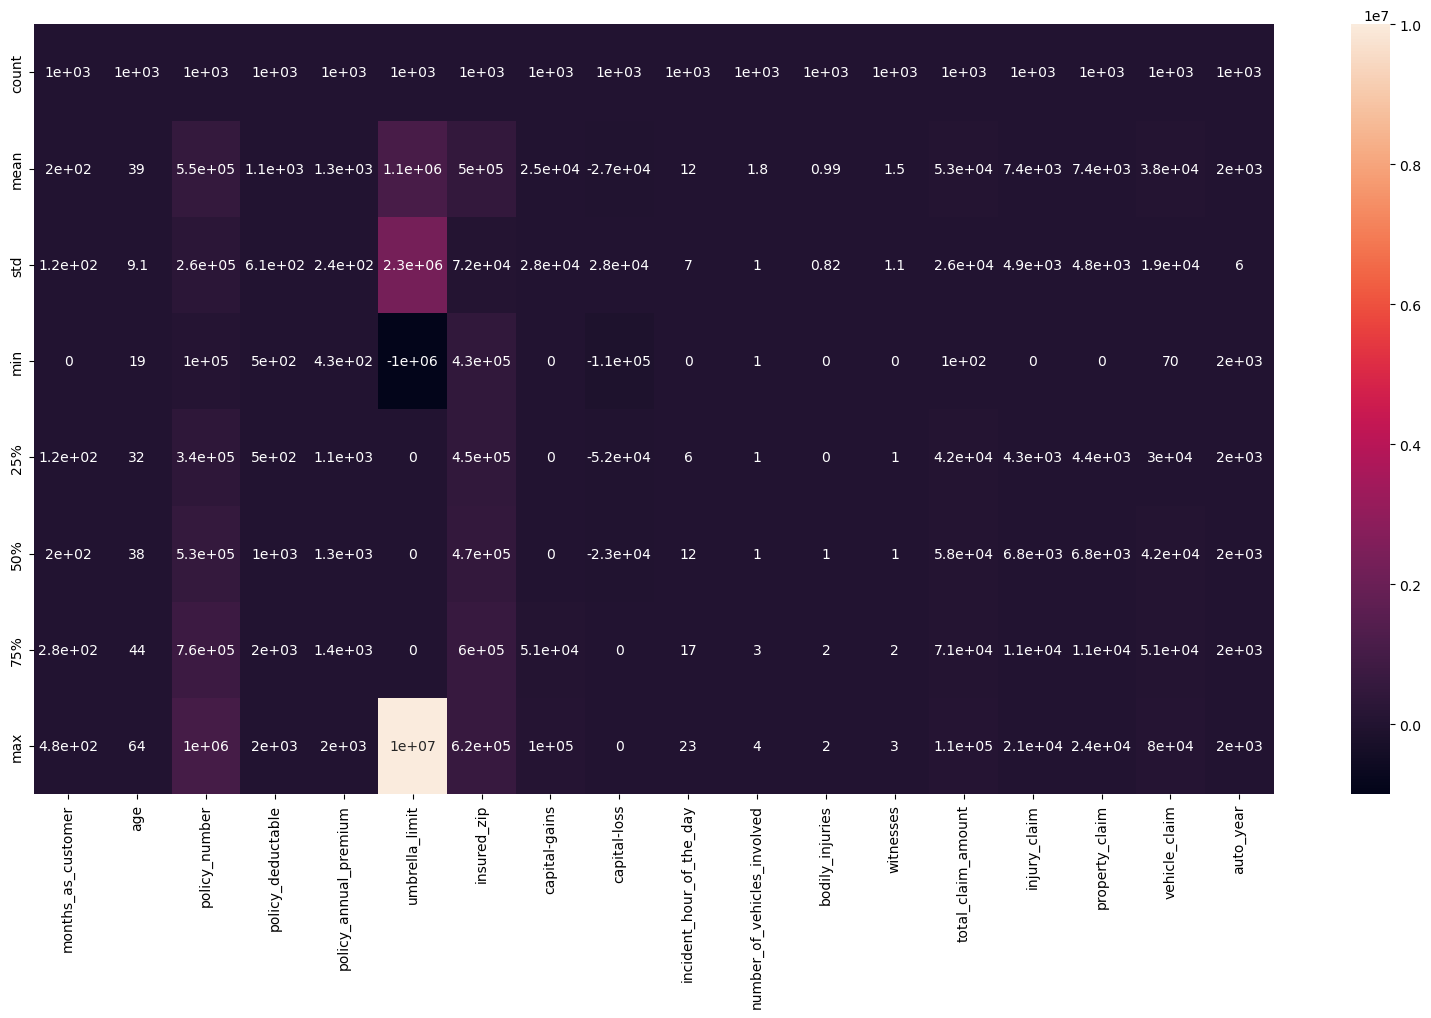

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True)
plt.show()

# We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [17]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [18]:
df.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,25,1,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,6,2006,21,1,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,9,6,2000,22,2,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,6,2014,17,2,2015


In [19]:
# Incident year for all data is 2015 so drop it.
df.drop(['incident_year'],axis=1,inplace=True)

# Splitting Data Into Categorical And Numerical

In [20]:
categorical_col=[]
for i in df.dtypes.index:
     if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical col",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        numerical_col.append(i)
print('Numerical col',numerical_col)
print('\n')
    


Categorical col ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical col ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']




In [21]:
df.nunique().to_frame('No. of Unique Values')

,No. of Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2


# Data Visualization

# EDA

# Fraud 

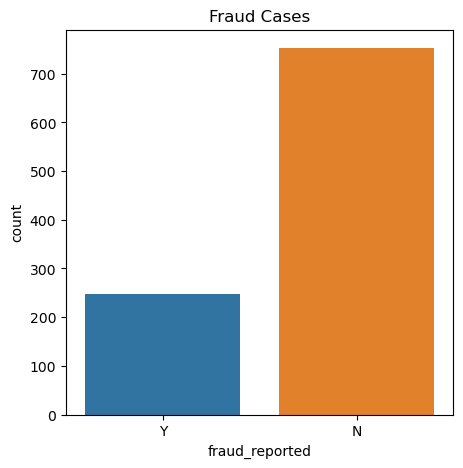

In [22]:
plt.figure(figsize=(5,5))
sns.countplot('fraud_reported',data=df)
plt.title('Fraud Cases')
plt.show()


Observation:

Out of all cases around 25 % cases are Fraud.

'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

# Age Vs Fraud

In [23]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


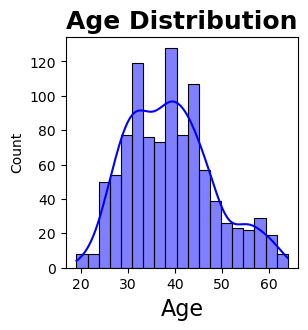

In [24]:
plt.figure(figsize=(3,3))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

Observation:

Maximum fraud cases comes from people with age group of 31-50 year.

Very few cases in 60+ year old peoples.

Text(0.5, 1.0, 'Plot1: age vs fraud_reported')

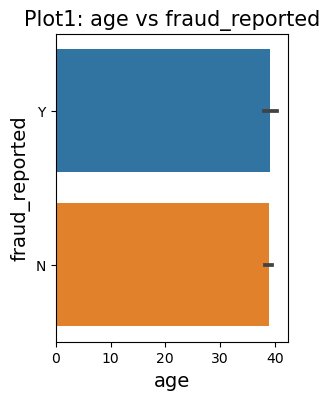

In [25]:
plt.figure(figsize=(3,4))
sns.barplot(x = 'age',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('age', fontsize = 14)
plt.title('Plot1: age vs fraud_reported', fontsize = 15)

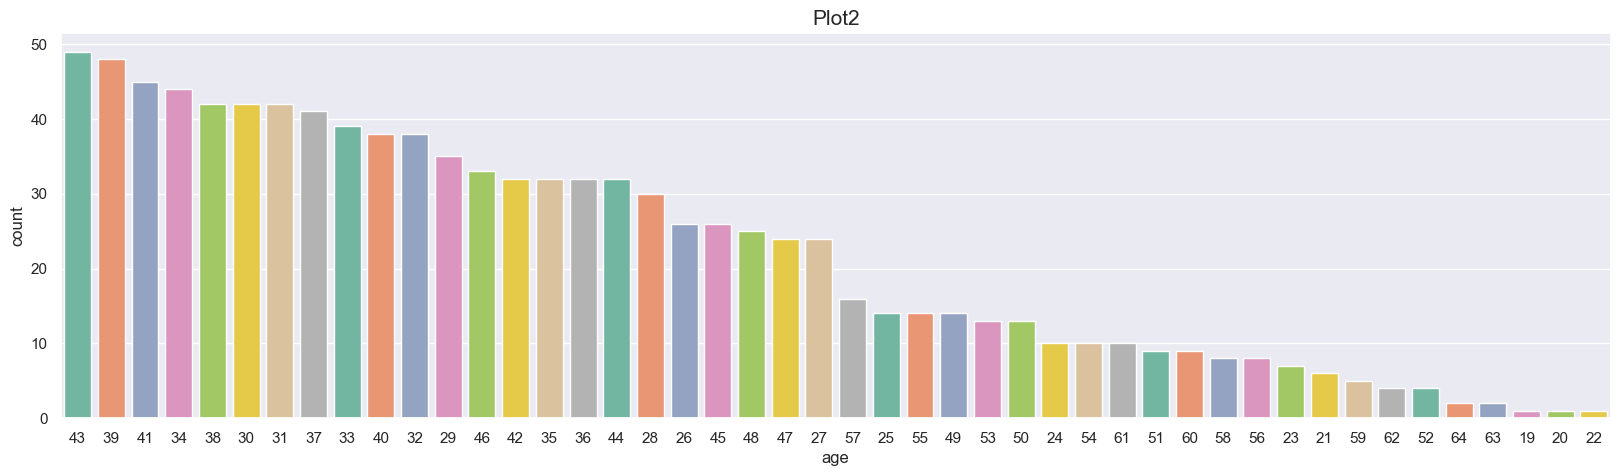

In [26]:
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="age",palette="Set2", data=df, order = df["age"].value_counts().index)
plt.title('Plot2', fontsize=15)
plt.show()

# Policy_state VS Fraud

In [27]:
df.groupby('policy_state')['fraud_reported'].value_counts(normalize = True ).sort_index(ascending=False)


policy_state  fraud_reported
OH            Y                 0.258523
              N                 0.741477
IN            Y                 0.254839
              N                 0.745161
IL            Y                 0.227811
              N                 0.772189
Name: fraud_reported, dtype: float64

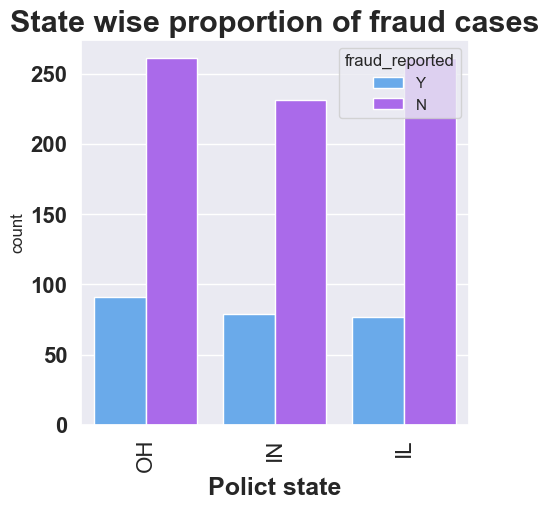

In [28]:
plt.figure(figsize=(5,5))
p = sns.countplot(df['policy_state'], hue=df['fraud_reported'], palette='cool')
plt.title('State wise proportion of fraud cases', fontsize=22, fontweight='bold')
p.set_xlabel('Polict state',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')

plt.show()

Observation:

Almost same amout of cases come from each state.

Maximum fraud cases come from state of Ohio.

# Policy_csl VS Fraud Detection

In [29]:
df.groupby('policy_csl')['fraud_reported'].value_counts().sort_index(ascending=False)

policy_csl  fraud_reported
500/1000    Y                  65
            N                 235
250/500     Y                  92
            N                 259
100/300     Y                  90
            N                 259
Name: fraud_reported, dtype: int64

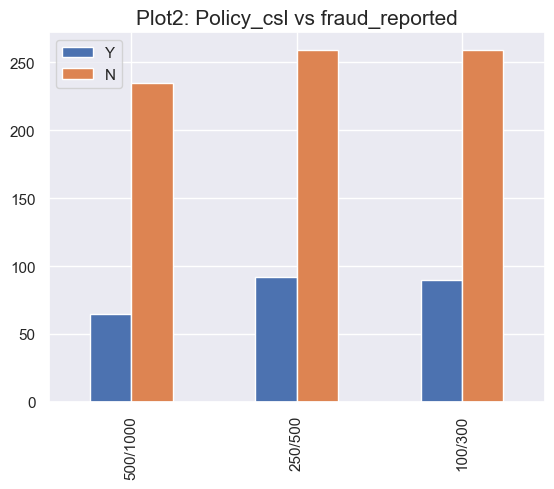

In [31]:
df_fraud_reported = {'Y': [65, 92, 90],
        'N': [235, 259, 259] }
df1 = pd.DataFrame(df_fraud_reported,columns=['Y','N'], index = ['500/1000','250/500','100/300'])
df1.plot.bar()
plt.title('Plot2: Policy_csl vs fraud_reported', fontsize = 15)
plt.show()

Observation:

1.Here are only 3 categories in this column '500/1000','250/500','100/300'

2.We can see, In Plot1, Policy csl of 100/300 are more than others

3.In Plot2 and the relationship between Policy_state vs fraud_reported - maximum peoples are not fraudulent but
in '250/500 and'100/300' csl claim fraud more than others

 

# Insured_sex VS Fraud Detection

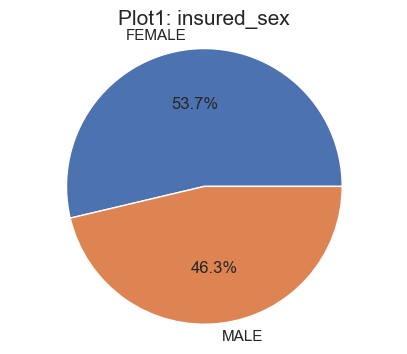

In [36]:
plt.figure(figsize=(5,4))
my_labels = 'FEMALE','MALE'
plt.pie(df['insured_sex'].value_counts(),labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: insured_sex', fontsize=15)
plt.axis('equal')
plt.show()

In [32]:
df.groupby('insured_sex')['fraud_reported'].value_counts().sort_index(ascending=False)

insured_sex  fraud_reported
MALE         Y                 121
             N                 342
FEMALE       Y                 126
             N                 411
Name: fraud_reported, dtype: int64

Text(0.5, 1.0, ' insured_sex vs fraud_reported')

<Figure size 500x400 with 0 Axes>

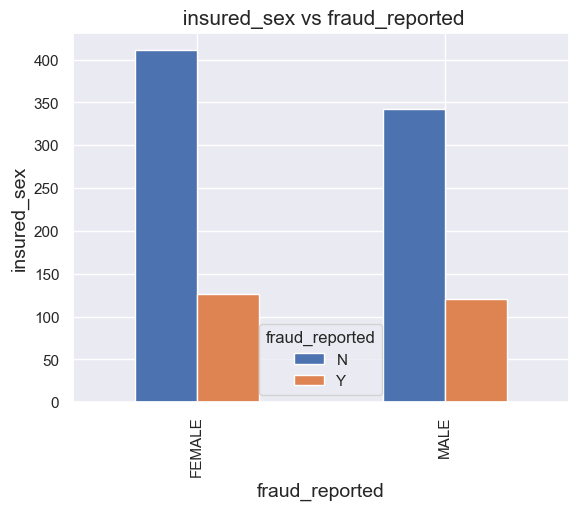

In [41]:
plt.figure(figsize=(5,4))
table=pd.crosstab(df[ 'insured_sex'],df['fraud_reported'])
table.plot(kind = 'bar')
plt.xlabel('fraud_reported', fontsize = 14)
plt.ylabel('insured_sex', fontsize = 14)
plt.title(' insured_sex vs fraud_reported', fontsize = 15)
            

Observation:

Number of claims come from female is higher than which reported by male insured.

Almost same amount of fraud cases comes from same gender.

# Education_level VS Fraud Detection

In [42]:
df['insured_education_level'].value_counts() 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

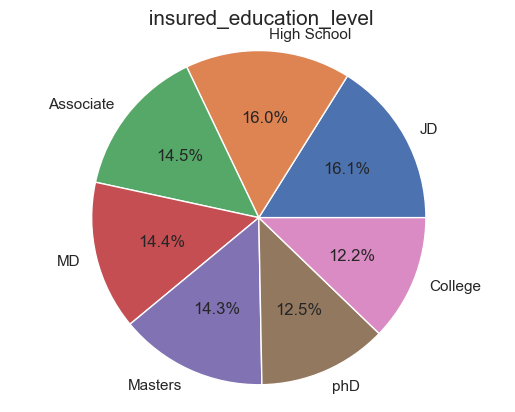

In [44]:
Values = [161,160,145,144,143,125,122]
my_labels = 'JD','High School','Associate','MD','Masters','phD','College'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title(' insured_education_level', fontsize=15)
plt.axis('equal')
plt.show()


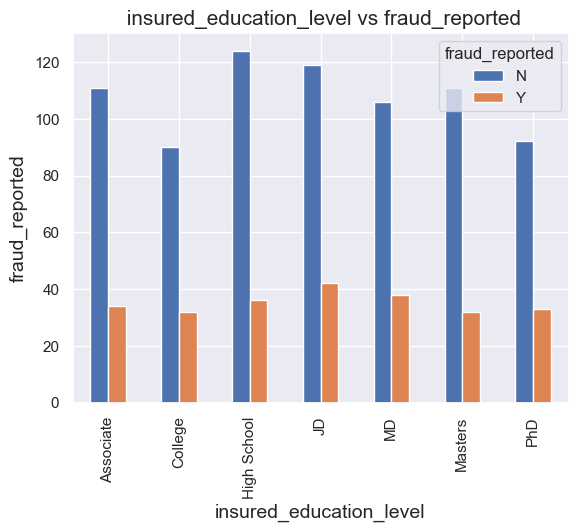

In [46]:
table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('insured_education_level', fontsize = 14)
plt.title(' insured_education_level vs fraud_reported', fontsize = 15)
plt.show()            

Observation:

We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD.
Education Level is not much important variable for us !!!

# Insured Occupation VS Fraud Detection

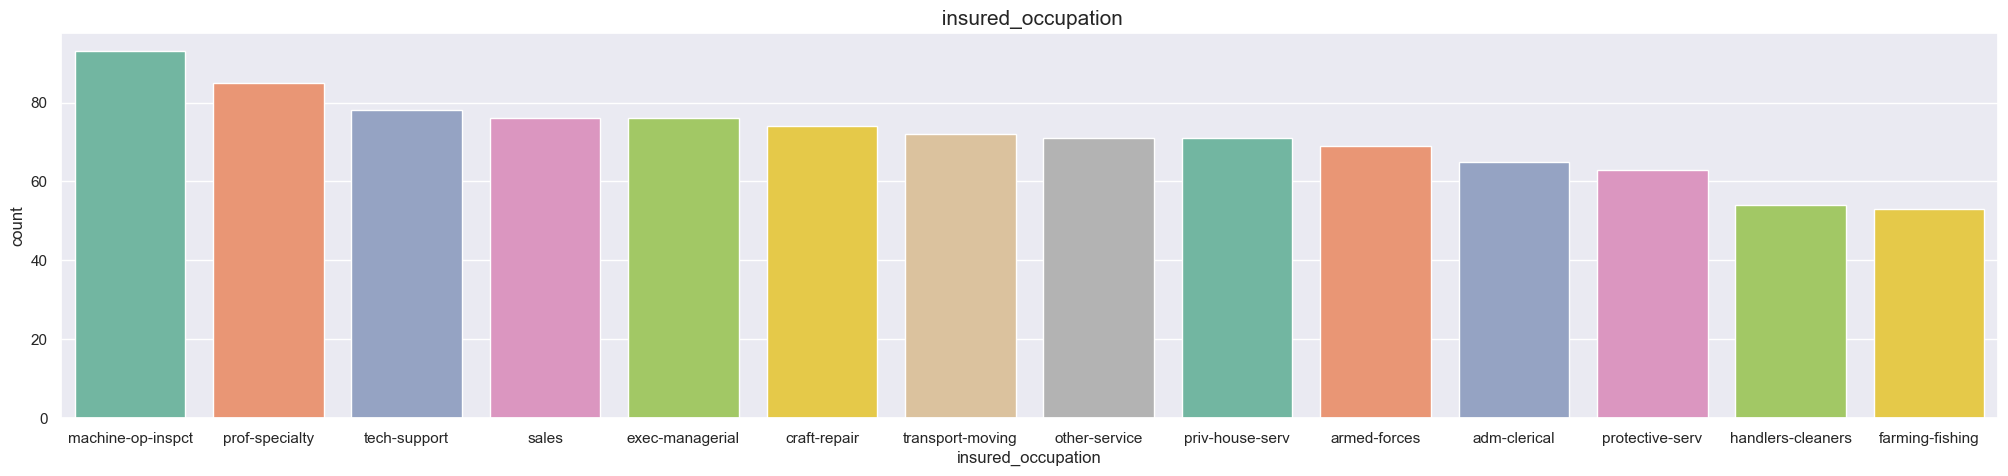

In [47]:
fig = plt.figure(figsize=(25,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_occupation",palette="Set2", data=df, order = df["insured_occupation"].value_counts().index)
plt.title(' insured_occupation', fontsize=15)
plt.show()

# Insured Hobbies

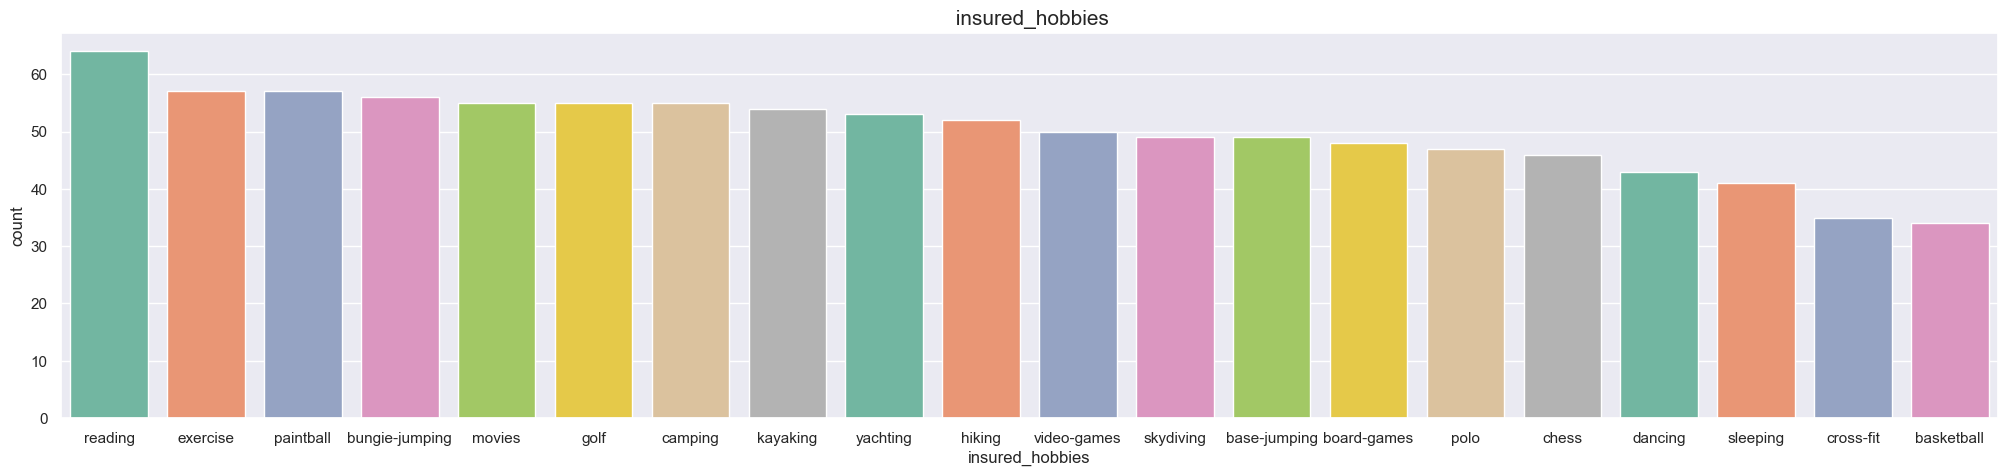

In [48]:
fig = plt.figure(figsize=(25,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="insured_hobbies",palette="Set2", data=df, order = df["insured_hobbies"].value_counts().index)
plt.title(' insured_hobbies', fontsize=15)
plt.show()

# Insured Relationship

In [55]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

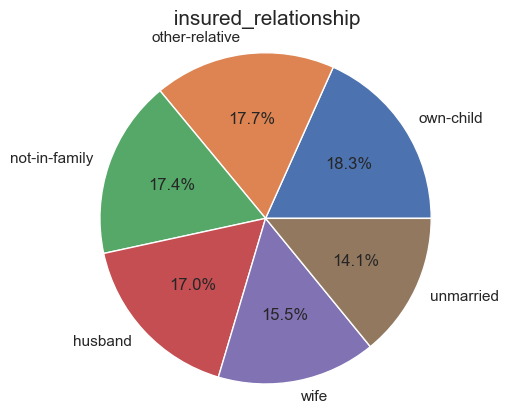

In [59]:
label=['own-child','other-relative','not-in-family','husband','wife','unmarried']
plt.pie(df['insured_relationship'].value_counts(),labels=label,autopct='%1.1f%%')
plt.title(' insured_relationship', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, ' insured_relationship vs fraud_reported')

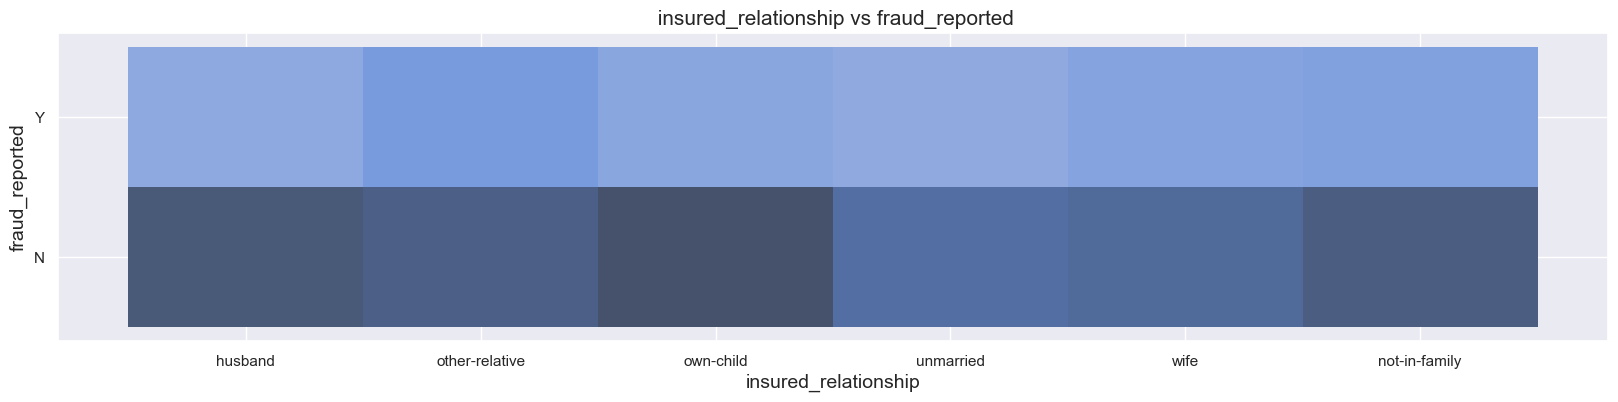

In [51]:
plt.figure(figsize=(20,4))
sns.histplot(x= 'insured_relationship',y= 'fraud_reported', data=df)
plt.ylabel('fraud_reported', fontsize = 14)
plt.xlabel('insured_relationship', fontsize = 14)
plt.title(' insured_relationship vs fraud_reported', fontsize = 15)

Observation:

Own-child percentage is higher than others

Maximum peoples are not fraudulent but other relatives category have higher rate of claiming fraud than others

# Incident Type VS Fraud Detection

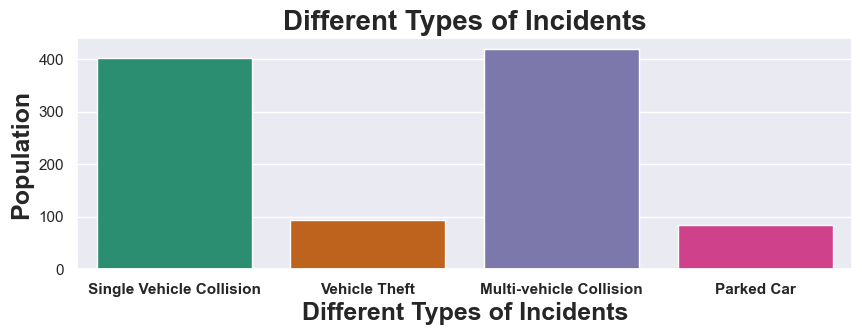

In [62]:
plt.figure(figsize = (10,3))
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

<Figure size 1200x500 with 0 Axes>

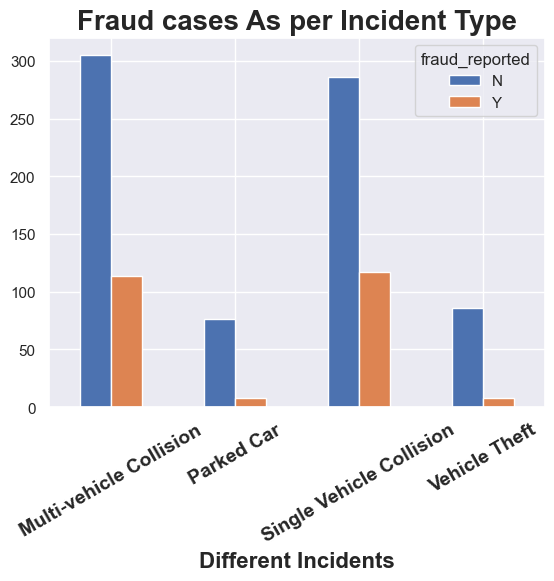

In [69]:
plt.figure(figsize = (12,5))
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.show()

Observation:

Most of case comes from Multi-vehicle and single vehicle collision.

Some claims are due to automobile robbery.

One claim out of three claim is fraud in multi or single vehicle collision incident.

# Collision Type VS Fraud Detection

In [70]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [71]:
df['collision_type'] = df['collision_type'].replace('?', 'Front Collision')

In [72]:
df['collision_type'].value_counts()

Front Collision    432
Rear Collision     292
Side Collision     276
Name: collision_type, dtype: int64

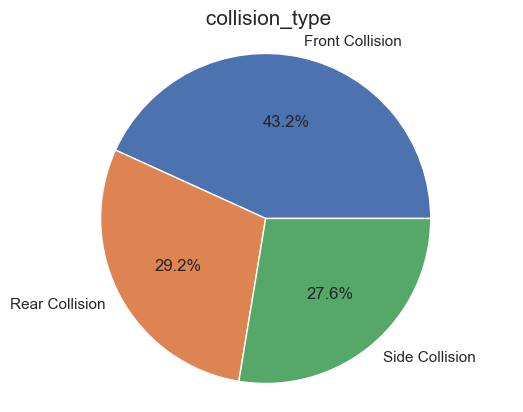

In [73]:
Values = [432,292,276]
my_labels = 'Front Collision','Rear Collision','Side Collision'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title(' collision_type', fontsize=15)
plt.axis('equal')
plt.show()

<Figure size 1200x500 with 0 Axes>

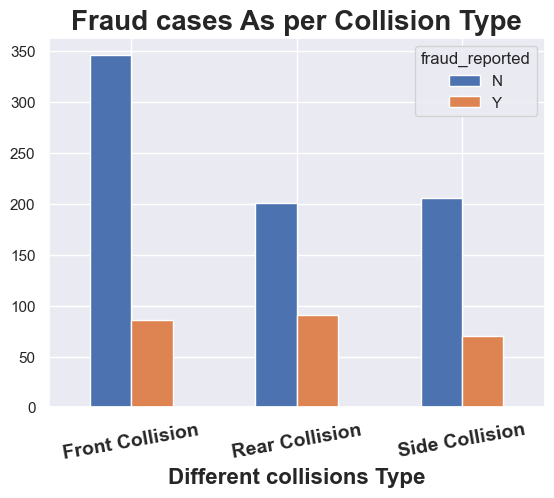

In [74]:
plt.figure(figsize = (12,5))
table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different collisions Type', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=10,fontweight ='bold')
plt.show()

<Figure size 1200x500 with 0 Axes>

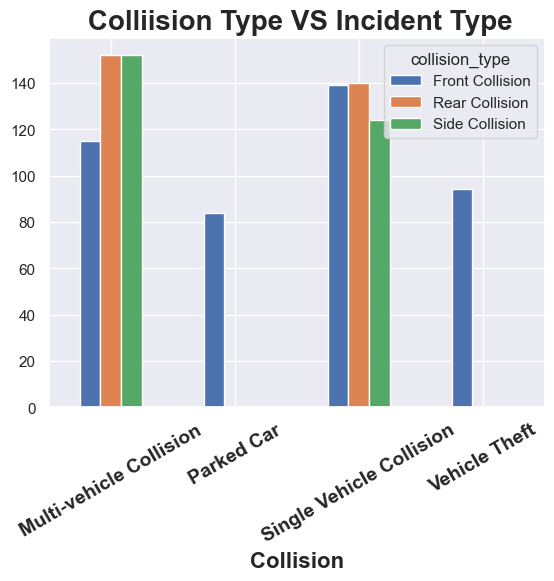

In [75]:
plt.figure(figsize = (12,5))
table = pd.crosstab(df['incident_type'], df['collision_type'])
table.plot(kind = 'bar')
plt.title(' Colliision Type VS Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.show()

# It looks like incident Type is important variable for us

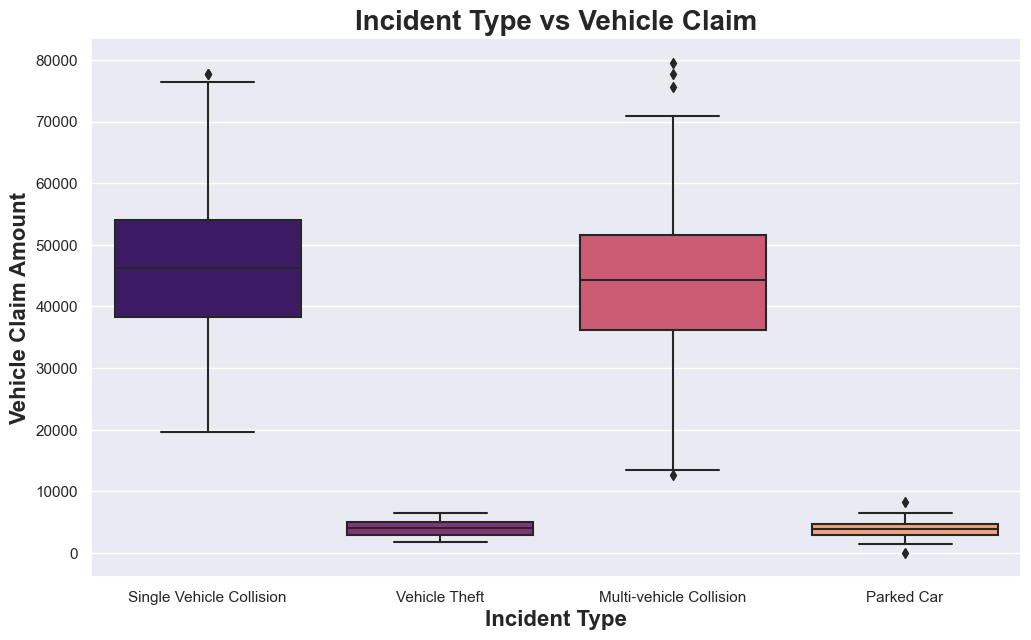

In [76]:

plt.figure(figsize=(12,7))
sns.boxplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

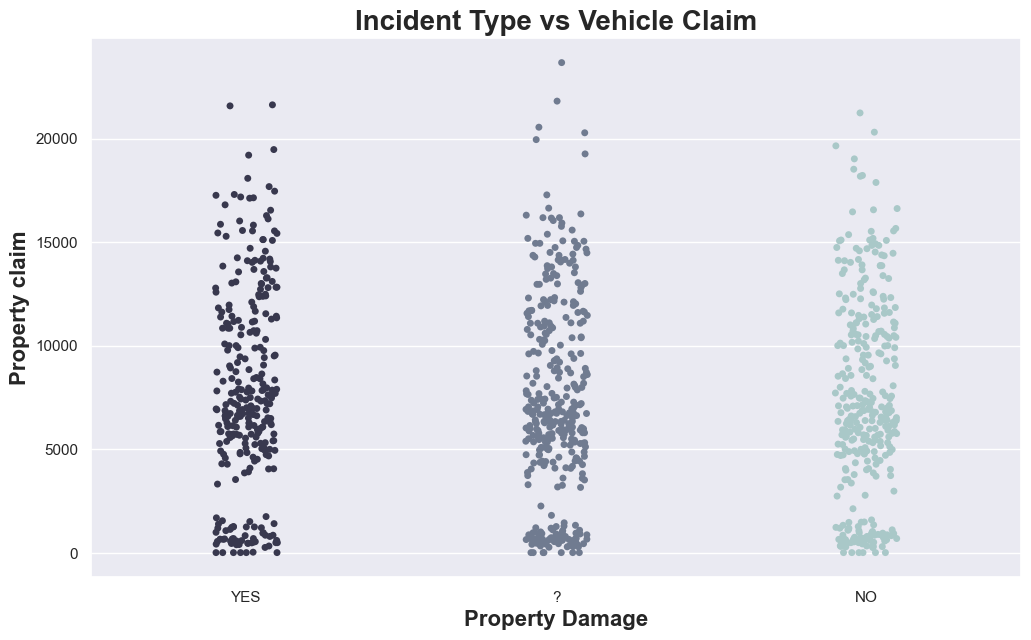

In [77]:
plt.figure(figsize=(12,7))
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

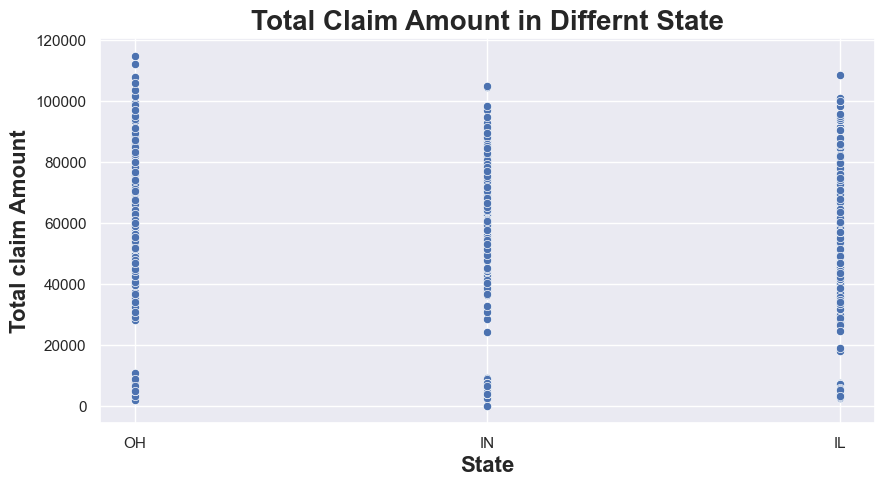

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

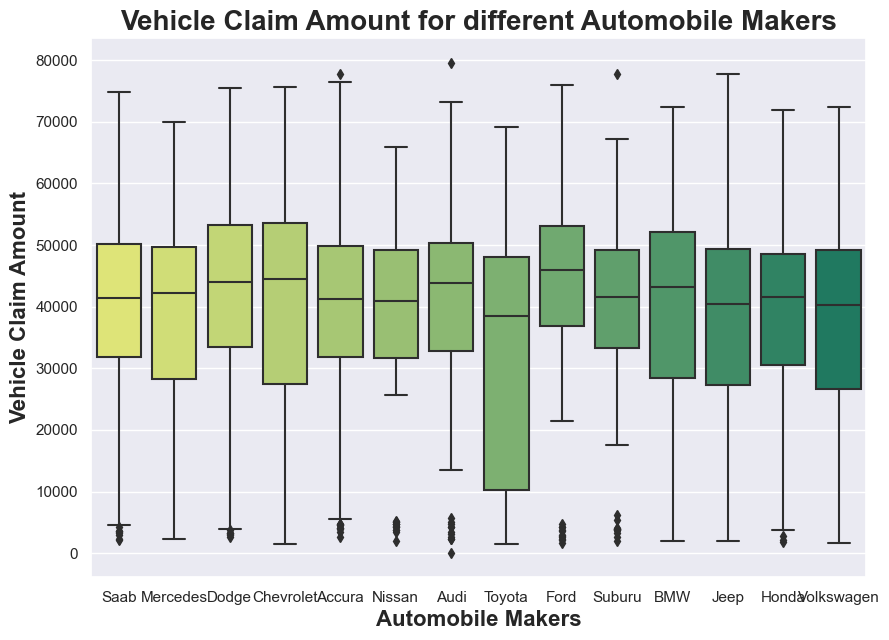

In [79]:
plt.figure(figsize=(10,7))
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

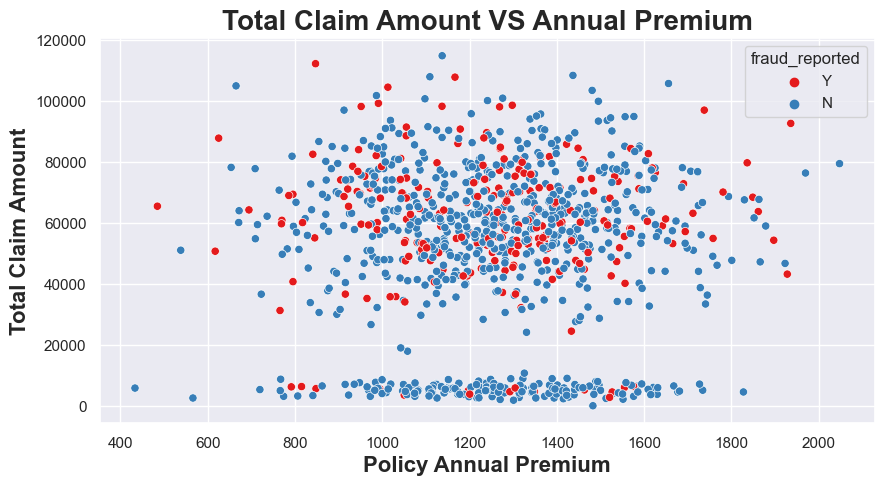

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

# Encoding Categorical Data

In [81]:
from sklearn.preprocessing import LabelEncoder


In [83]:
category=['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 
          'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 
          'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make',
          'auto_model', 'fraud_reported']

In [84]:
le = LabelEncoder()
for i in category:
    df[i]=le.fit_transform(df[i])
    
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,6,6,2014,17,2


# Outliers Detection and Removal

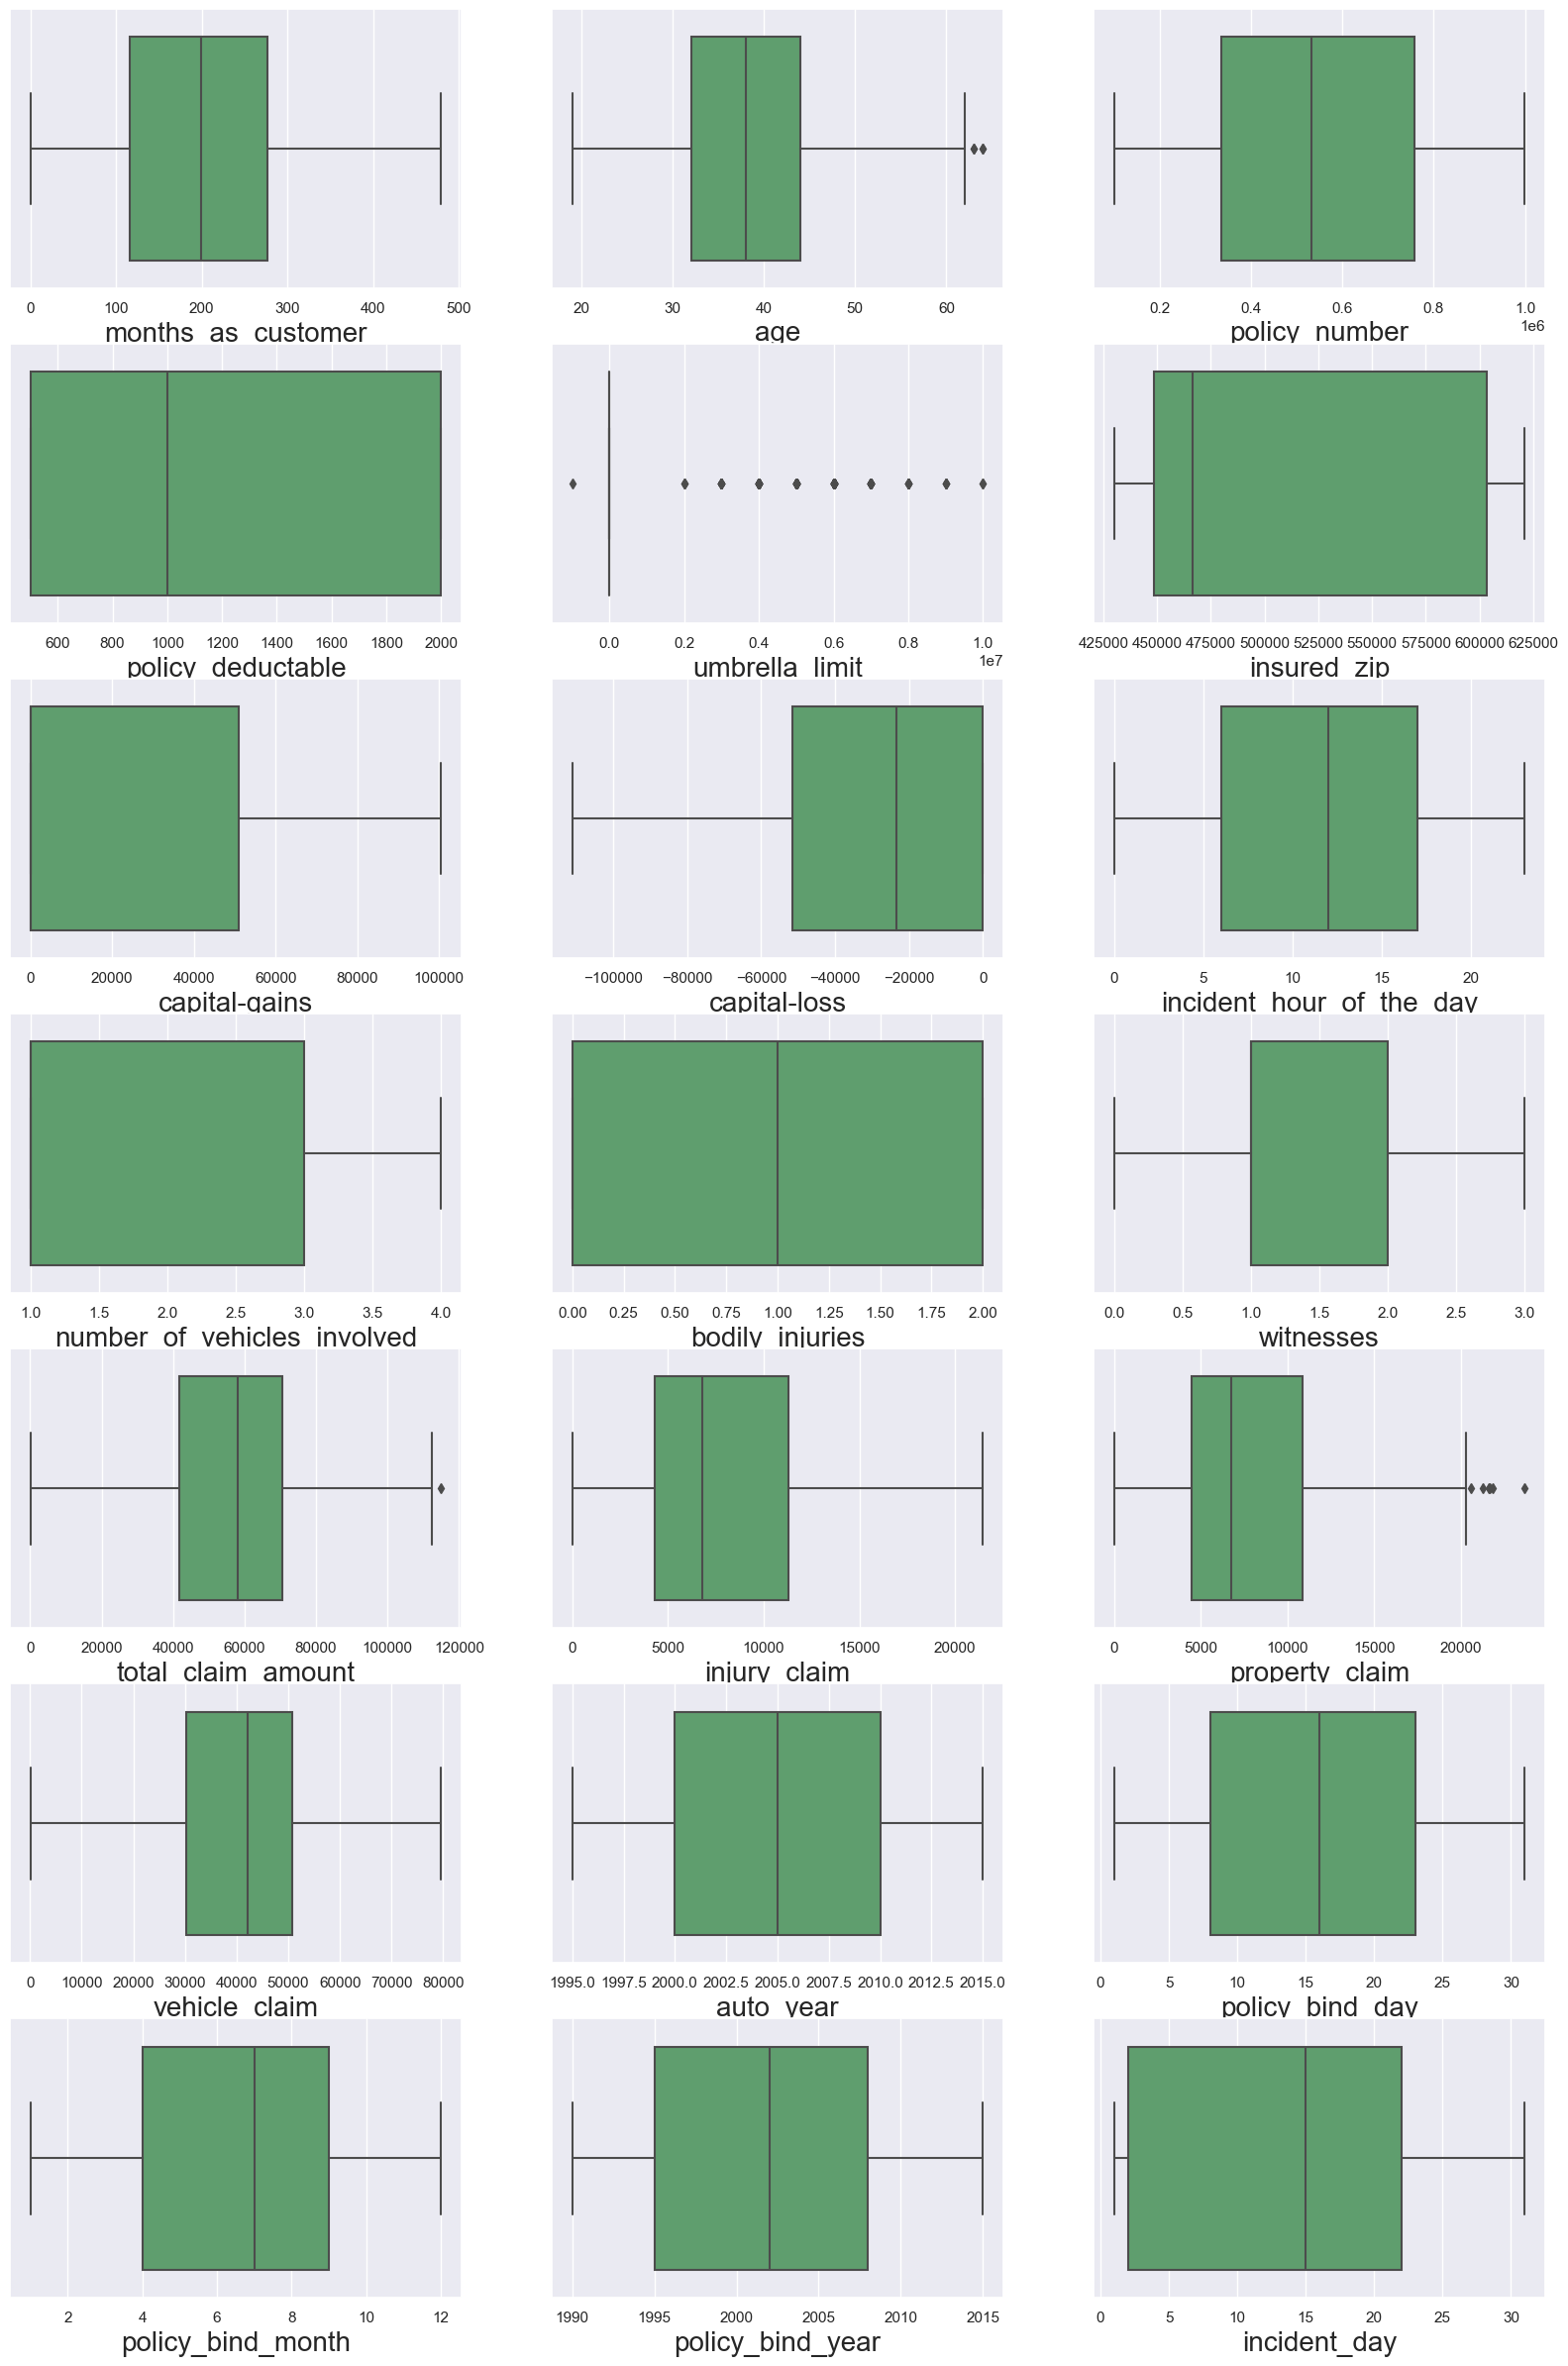

In [86]:
plt.figure(figsize=(20,30),facecolor='white')
p=1

for column in numerical_col:
    if p<=21:
        ax=plt.subplot(7,3,p)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    p+=1
plt.show()

Observation:  From Boxplot we can see outliers exist dataset.

# Outliers Removal Through ZScore

In [88]:
from scipy.stats import zscore

In [89]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 42)
Shape of the dataframe after removing outliers:  (980, 42)
Percentage of data loss post outlier removal:  2.0


# Skewness

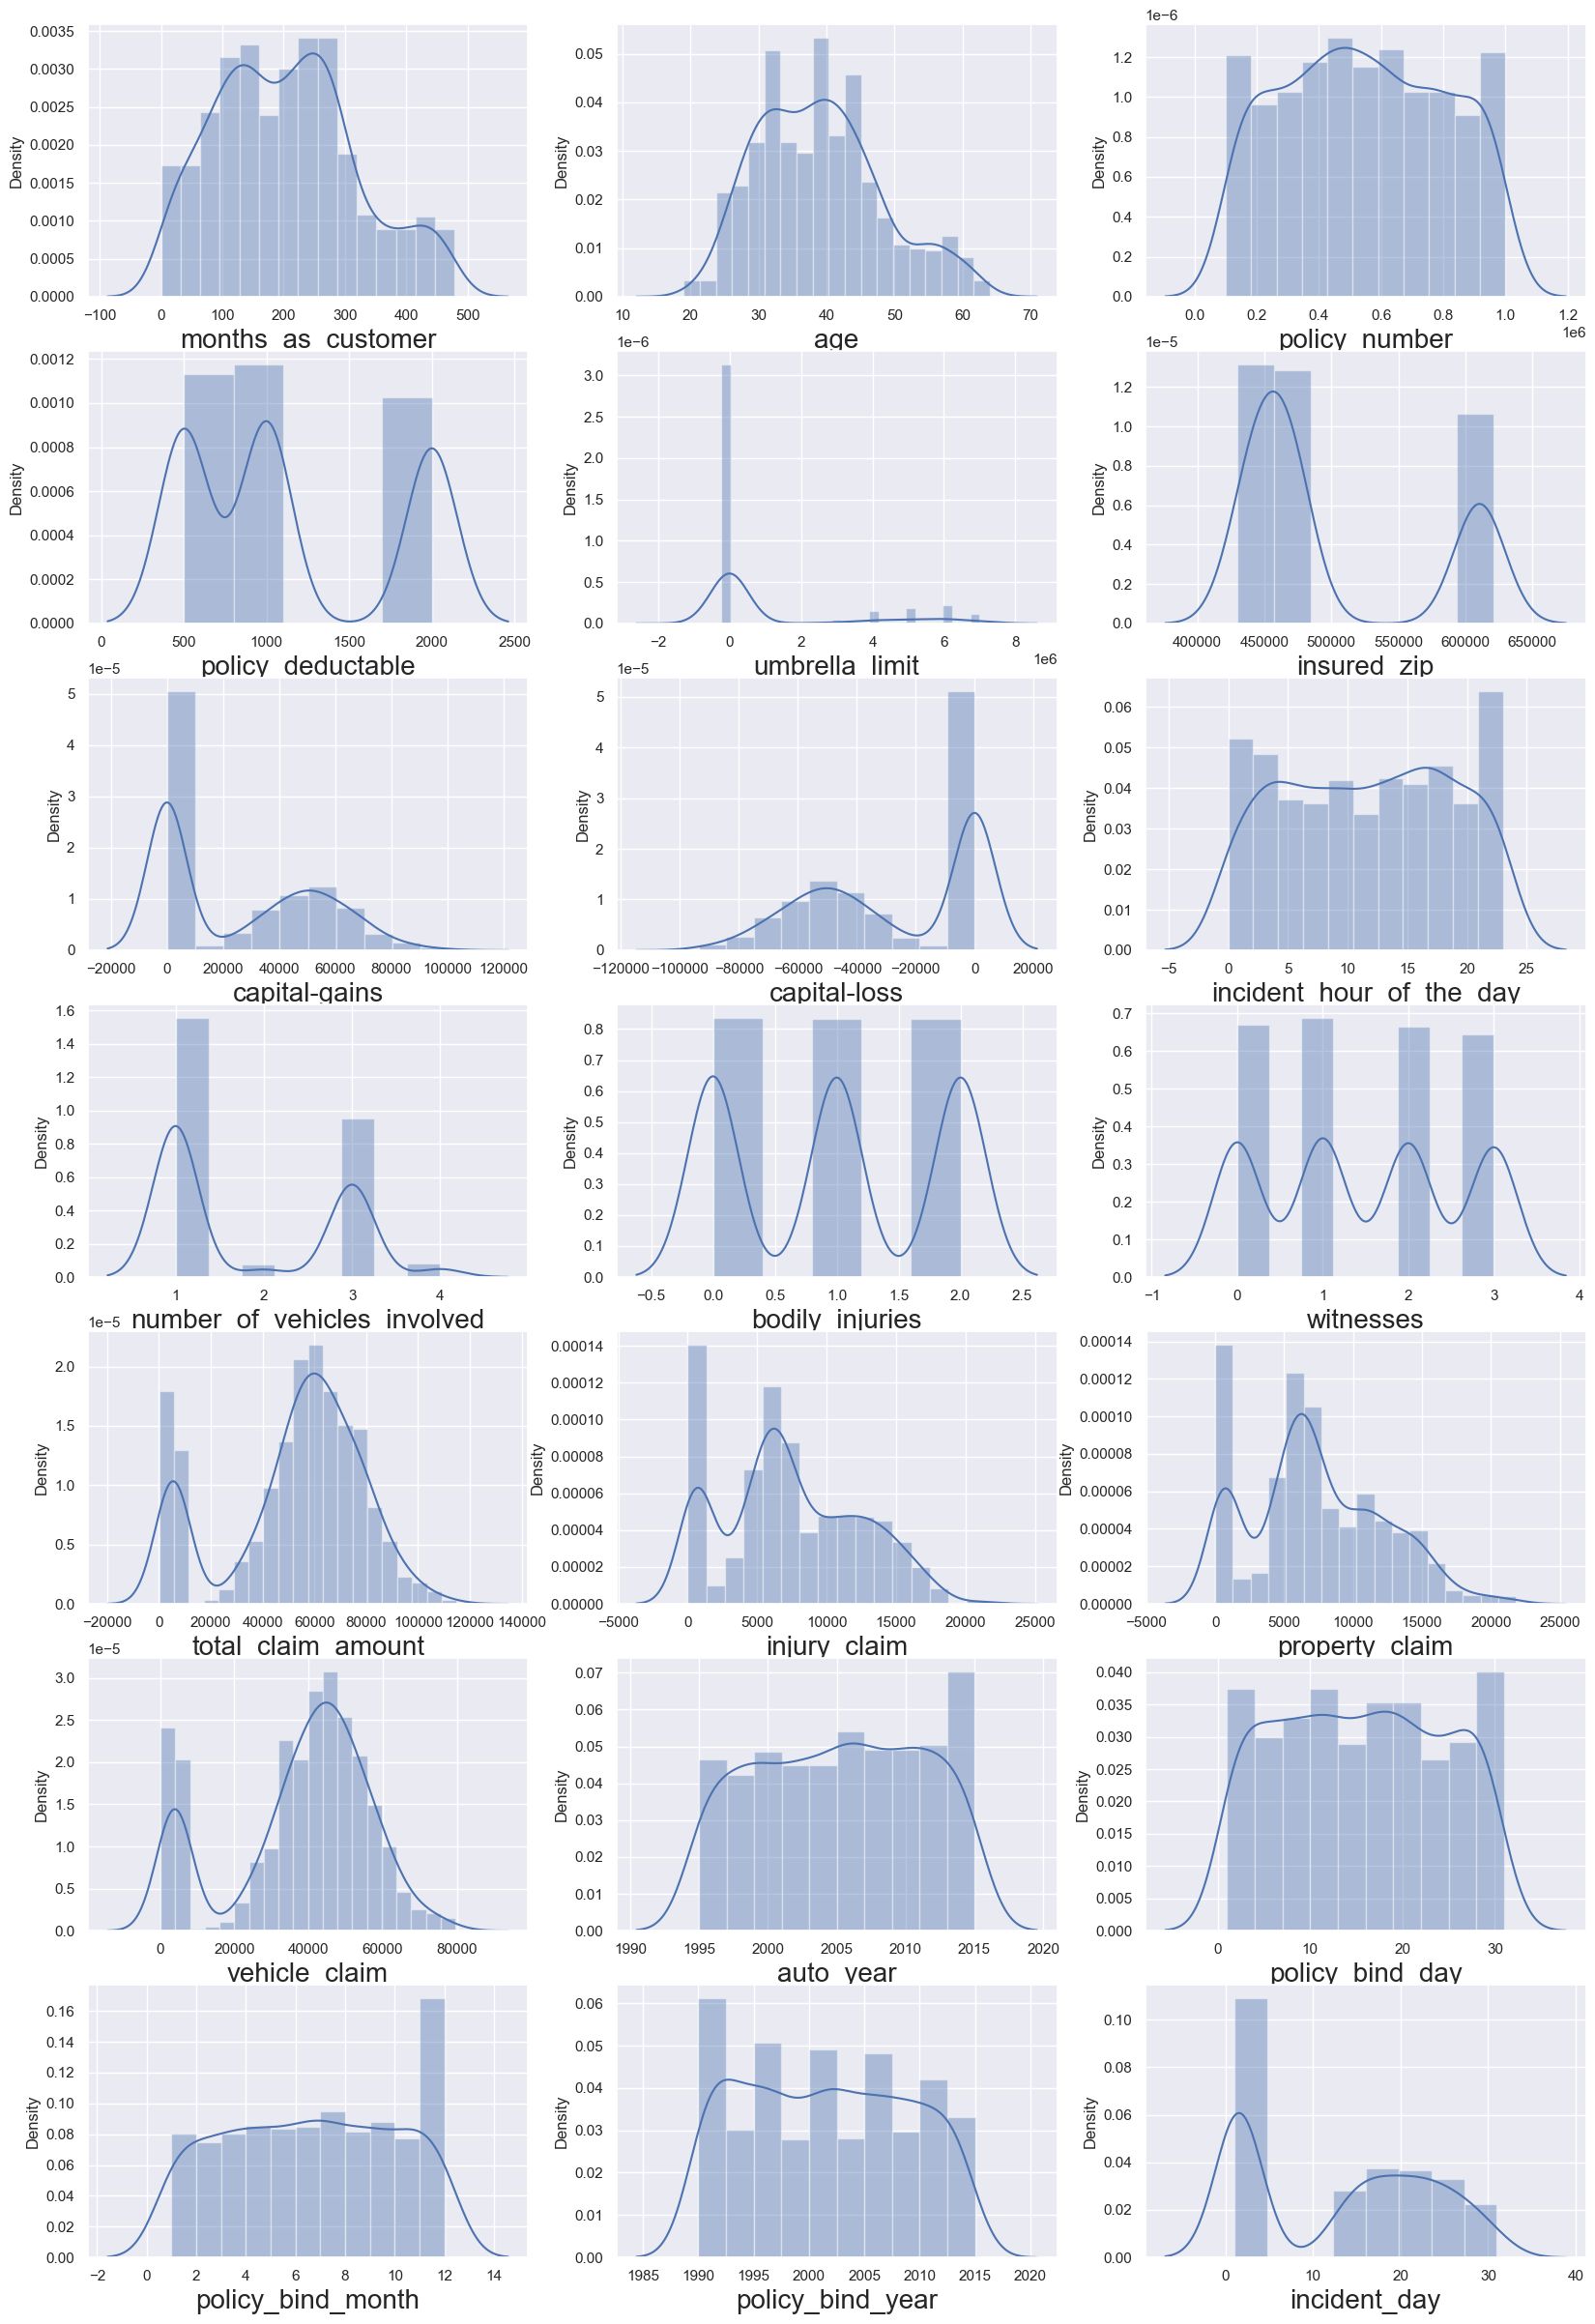

In [91]:
plt.figure(figsize=(20,30),facecolor='white')

p=1
for col in numerical_col:
    if p<=21:
        plt.subplot(7,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    p+=1
plt.show()

In [92]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                 0.297297
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


Observation:

1.Out above features 'umbrella_limit','total_claim_amount','incident_month' and 'vehicle_claim' are continous variable with skew data. 
The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

2.We will use yeo-johnson method to transform negatively skewed data.

# Removing Skewness

In [93]:
from sklearn.preprocessing import PowerTransformer

In [94]:
skew=['total_claim_amount','vehicle_claim']
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [95]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

# Correlation

In [96]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922960,0.061267,-0.007183,-0.021855,0.031041,-0.003814,0.018213,0.029572,0.059644,...,0.056360,0.049734,0.005130,0.000869,0.021285,0.050824,0.004207,-0.041914,-0.010538,0.019242
age,0.922960,1.000000,0.062332,-0.020012,-0.013323,0.032036,0.005330,0.013256,0.035864,0.073790,...,0.059129,0.033757,0.015322,0.005594,0.013279,0.053147,0.014492,-0.031709,-0.005843,0.018221
policy_number,0.061267,0.062332,1.000000,0.071343,0.042129,-0.009812,0.028686,-0.000145,0.004531,0.007069,...,-0.018890,0.016494,0.064599,-0.005574,-0.036887,0.052670,0.001913,-0.041632,0.050839,-0.042345
policy_state,-0.007183,-0.020012,0.071343,1.000000,0.001653,0.017612,0.015089,-0.010921,0.020669,-0.018002,...,-0.006411,0.010259,-0.018008,-0.001160,0.034587,-0.000583,0.073692,-0.003045,0.016049,0.027889
policy_csl,-0.021855,-0.013323,0.042129,0.001653,1.000000,0.009912,0.032654,0.013504,0.005593,-0.003405,...,-0.042728,-0.009395,0.042905,-0.030370,-0.032509,0.013568,-0.041283,-0.019409,-0.002278,-0.010904
policy_deductable,0.031041,0.032036,-0.009812,0.017612,0.009912,1.000000,-0.008300,0.013471,-0.004399,-0.006977,...,0.004874,-0.028032,-0.002591,0.030569,0.015774,0.013395,-0.054208,-0.054041,-0.018115,-0.010288
policy_annual_premium,-0.003814,0.005330,0.028686,0.015089,0.032654,-0.008300,1.000000,-0.014107,0.047651,0.041312,...,0.009194,0.009311,-0.038226,-0.042446,-0.012686,-0.032681,-0.031608,0.002433,0.018671,0.009544
umbrella_limit,0.018213,0.013256,-0.000145,-0.010921,0.013504,0.013471,-0.014107,1.000000,0.004481,0.018068,...,-0.048842,0.012857,0.015360,0.027952,0.044729,-0.030416,-0.001072,0.049032,-0.031948,0.029210
insured_zip,0.029572,0.035864,0.004531,0.020669,0.005593,-0.004399,0.047651,0.004481,1.000000,-0.038086,...,-0.042162,-0.020518,0.021858,-0.041291,0.009699,-0.038856,0.013186,-0.003239,0.016751,0.006489
insured_sex,0.059644,0.073790,0.007069,-0.018002,-0.003405,-0.006977,0.041312,0.018068,-0.038086,1.000000,...,-0.023597,0.019996,-0.018657,-0.033336,0.020582,0.047690,-0.003125,-0.031230,-0.017208,0.036916


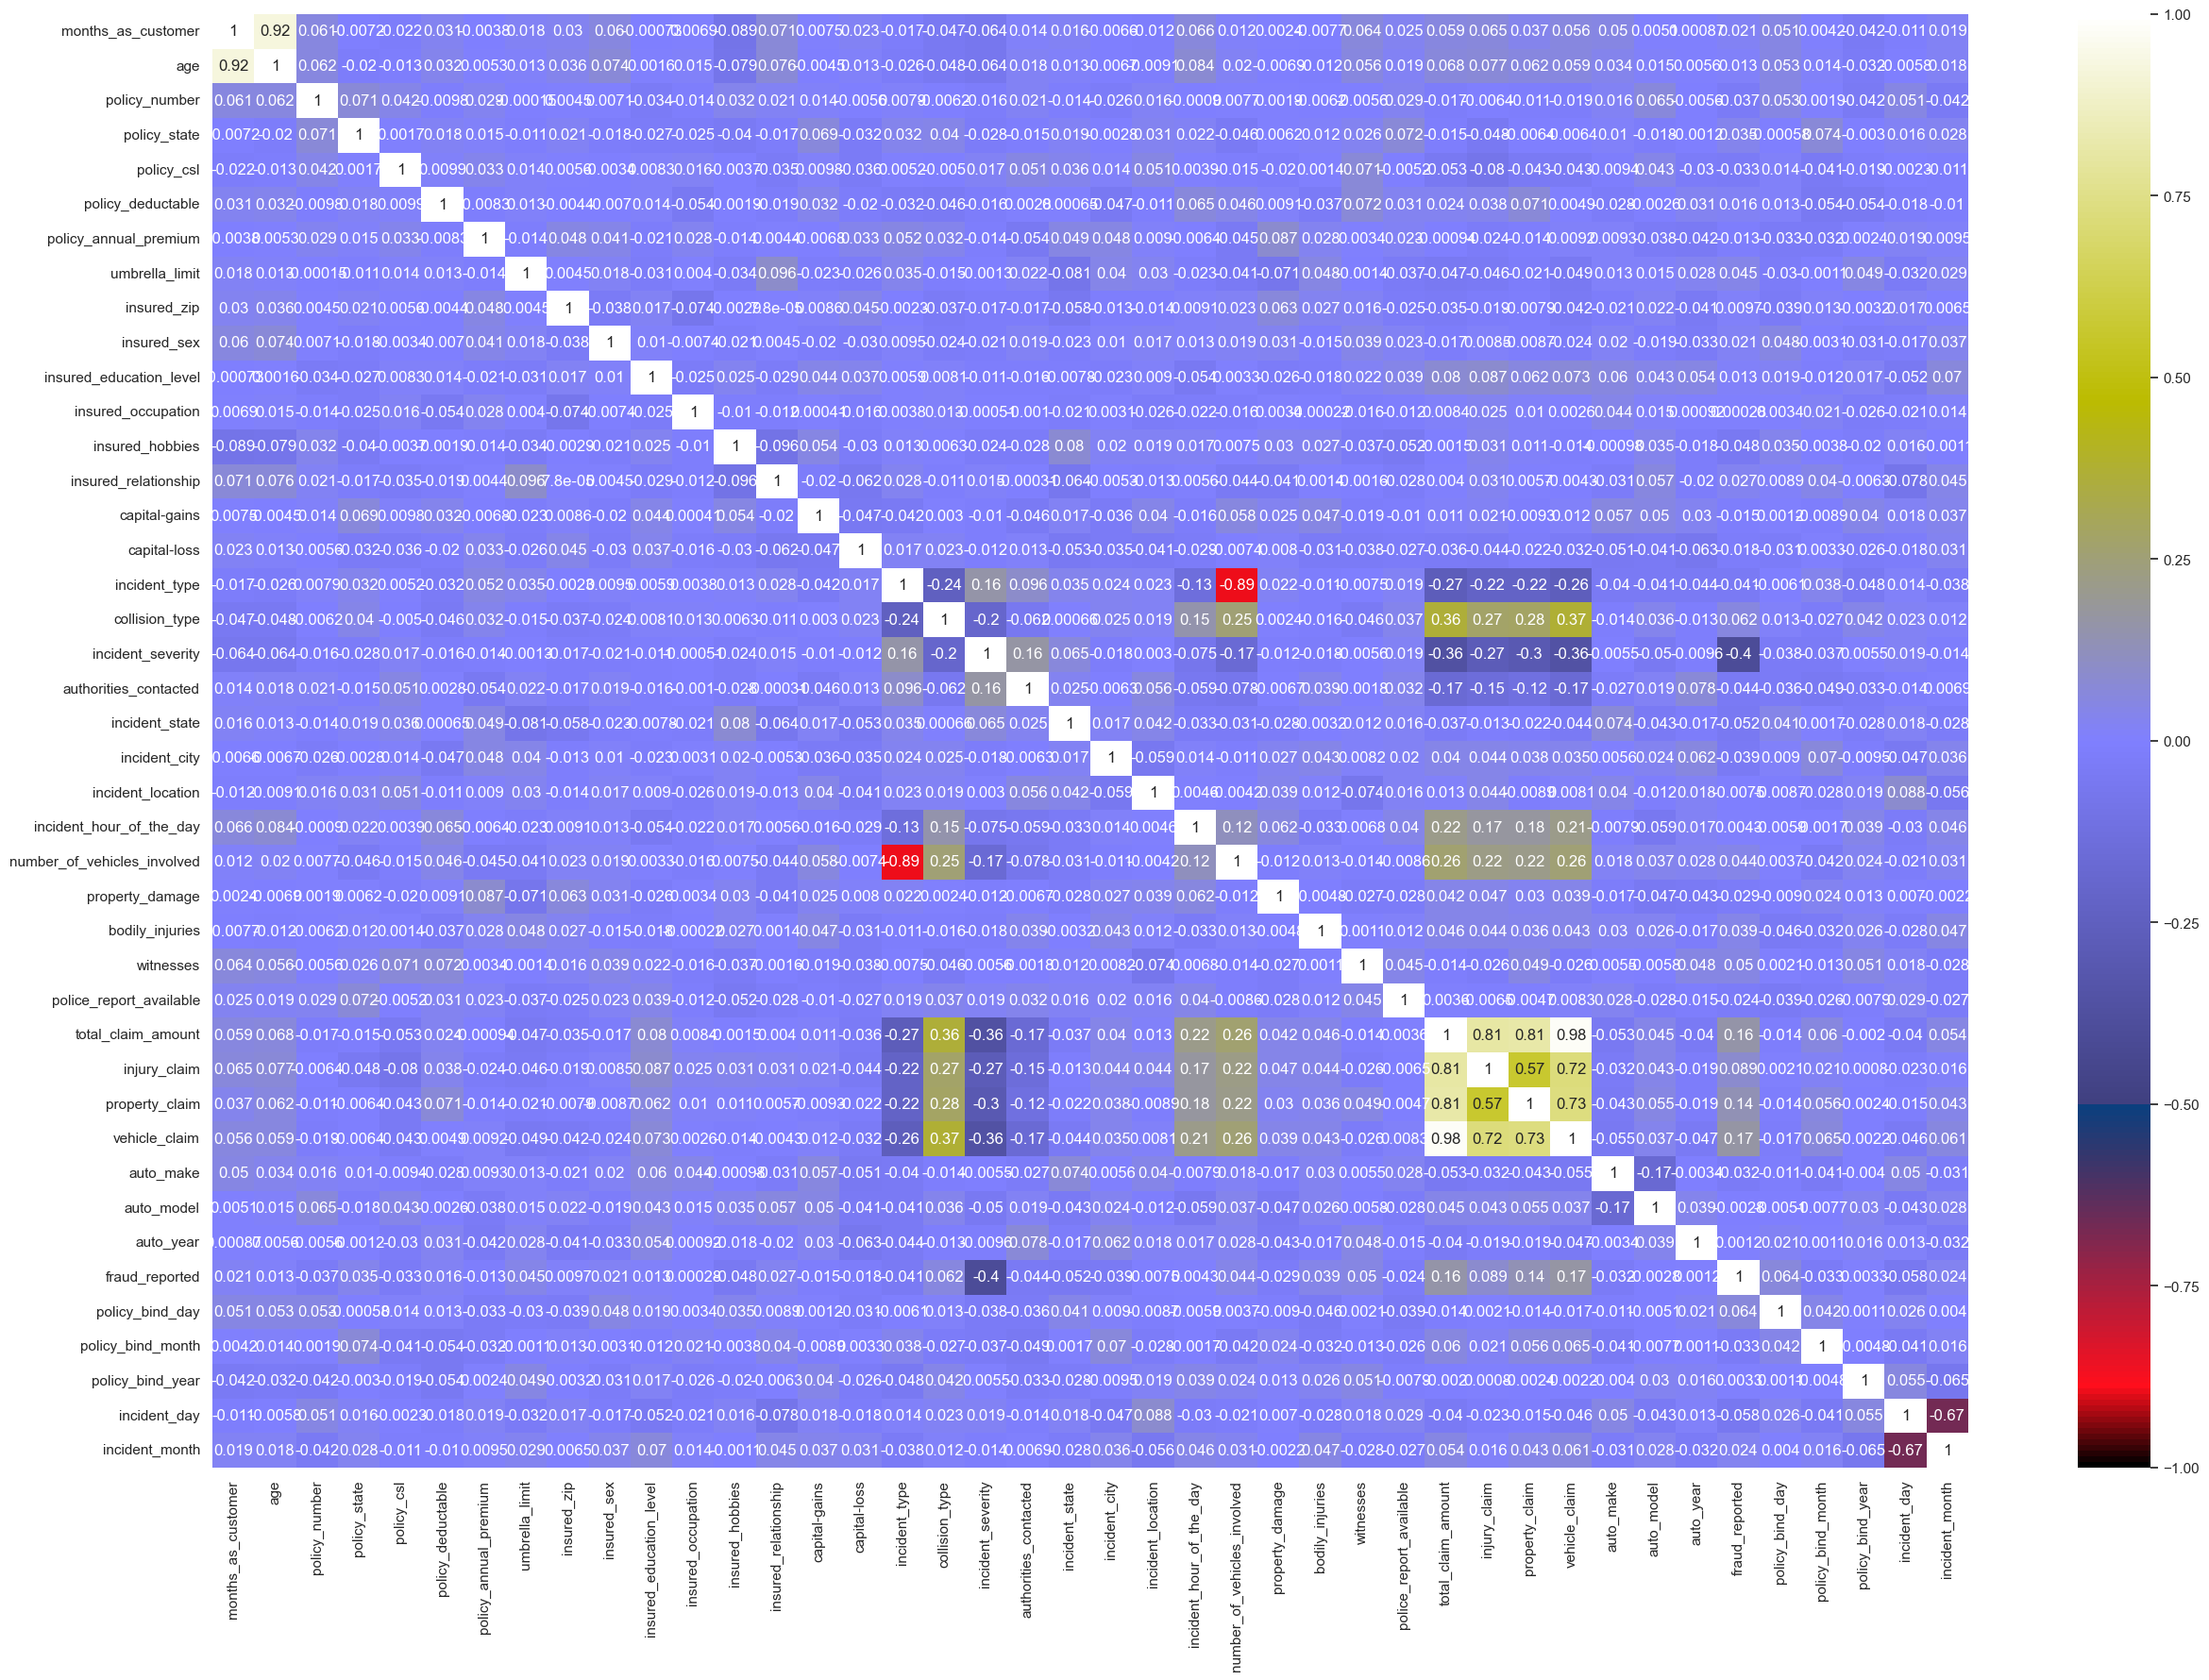

In [97]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="gist_stern")
plt.show()

Observation:

1.Incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with
target variable.

2.Other variable are poorly correlated with target variable.

3.Injury_claim,property_claim,vehicle_claim are highly correlated with each other.

4.Incident_hour_of_the_day is highly negative correlated with incident type.

# Balancing Imbalanced Target Feature

In [98]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

# Balancing through SMOTE

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
x = df.drop(['fraud_reported'], axis =1)
y = df['fraud_reported']

In [101]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)

In [102]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Scaling Of Data

In [103]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.12118751,  1.04220063, -0.05784983, ...,  1.82685156,
         1.23230593, -0.7337146 ],
       [ 0.20935742,  0.35737441, -0.76592459, ...,  0.65987436,
         0.82296629, -0.7337146 ],
       [-0.64776286, -1.12641575,  0.60028801, ..., -0.21535855,
         0.9253012 , -0.41014559],
       ...,
       [ 0.09993781, -0.44158952,  0.95641534, ...,  0.65987436,
        -0.91672719,  0.88413047],
       [ 1.96007119,  1.95530227,  0.703375  , ..., -1.5282079 ,
         0.10662191, -0.7337146 ],
       [-0.65688116, -0.32745182, -0.8754815 , ..., -0.21535855,
         0.004287  , -0.7337146 ]])

# Multicollinearity

# VIF

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,33.461694,months_as_customer
1,153.439487,age
2,5.846051,policy_number
3,2.505452,policy_state
4,2.264853,policy_csl
5,5.246873,policy_deductable
6,33.467057,policy_annual_premium
7,1.318599,umbrella_limit
8,56.378386,insured_zip
9,1.731409,insured_sex


Observation:

Removing Some of highly correlated features. But this will not work here as most of input features are correlated with 
each other either moderated or poorly.

# Modelling Of Data

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (991, 41)
Training target vector size: (991,)
Test feature matrix size: (489, 41)
Test target vector size: (489,)


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6196319018404908 on Random_state 9


# Logistic Regression

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.5766871165644172


Confusion matrix of Logistics Regression : [[157  78]
 [129 125]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.55      0.67      0.60       235
           1       0.62      0.49      0.55       254

    accuracy                           0.58       489
   macro avg       0.58      0.58      0.57       489
weighted avg       0.58      0.58      0.57       489



# Other ML mOdels

In [113]:
model=[ AdaBoostClassifier(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier()]
        
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('Accuracy Score :', accuracy_score(y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix AdaBoostClassifier() is


Accuracy Score : 0.8220858895705522


Confusion matrix : [[198  37]
 [ 50 204]]


Classification Report :               precision    recall  f1-score   support

           0       0.80      0.84      0.82       235
           1       0.85      0.80      0.82       254

    accuracy                           0.82       489
   macro avg       0.82      0.82      0.82       489
weighted avg       0.82      0.82      0.82       489



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.49079754601226994


Confusion matrix : [[190  45]
 [204  50]]


Classification Report :               precision    recall  f1-score   support

           0       0.48      0.81      0.60       235
           1       0.53      0.20      0.29       254

    accuracy                           0.49       489
   macro avg       0.50      0.50      0.45       489
weighted avg       0.51      0.49      0.44       489





# Cross Val Score

In [114]:
model=[ AdaBoostClassifier(),
        LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, x, y, cv =5)
    print('\n')
    print('Cross Validation Score', m,)
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score AdaBoostClassifier()
Score : [0.6722973  0.77702703 0.89864865 0.91891892 0.92567568]
Mean Score : 0.8385135135135136
Std deviation : 0.09908271772877494




Cross Validation Score LogisticRegression()
Score : [0.58108108 0.53040541 0.50675676 0.60135135 0.61148649]
Mean Score : 0.5662162162162162
Std deviation : 0.040798727403920335




Cross Validation Score SVC()
Score : [0.52702703 0.48986486 0.52364865 0.53378378 0.56756757]
Mean Score : 0.5283783783783784
Std deviation : 0.02478910314573532




Cross Validation Score GaussianNB()
Score : [0.56418919 0.55067568 0.58783784 0.67567568 0.66216216]
Mean Score : 0.6081081081081081
Std deviation : 0.051235644892240216




Cross Validation Score DecisionTreeClassifier()
Score : [0.73648649 0.78040541 0.86148649 0.90540541 0.89527027]
Mean Score : 0.8358108108108109
Std deviation : 0.06629201398060018




Cross Validation Score KNeighborsClassifier(n_neighbors=3)
Score : [0.70608108 0.70945946 0.74324324 0.7128378

# We can see that Gradient Boosting Classifier has highest accuracy among all other ML Models of 86%

# Hyper Parameter Tuning- Grid Search CV

In [115]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameter = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [119]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             verbose=3)

In [120]:
GCV.best_params_

{'learning_rate': 1, 'max_depth': 9, 'n_estimators': 250}

# Final Model

In [121]:
Model=GradientBoostingClassifier(learning_rate=1,n_estimators= 250, max_depth=9 )
Model.fit(x_train,y_train)

print('Accuracy Score :', accuracy_score(y_test, y_pred))

Accuracy Score : 0.869120654396728


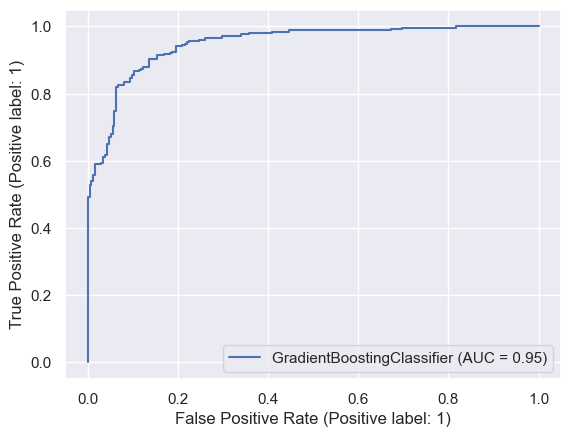

<Figure size 1000x1000 with 0 Axes>

Auc Score : 0.8751465907187134


In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(y_test, Model.predict(x_test))
print('Auc Score :',auc_score)

# Saving Model

In [123]:
import joblib
import pickle

In [124]:
filename='Insurance Claim Fraud.pkl'
pickle.dump(Model,open(filename,'wb'))

# Prediction

In [126]:
prediction = Model.predict(x_test)

In [128]:
Actual = np.array(y_test)
df_pred = pd.DataFrame()
df_pred["Predicted Values"] = prediction
df_pred["Actual Values"] = Actual
df_pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
